In [1]:
import time
from datetime import datetime, timedelta
import sys

In [2]:
sys.path.insert(0, "/content/drive/MyDrive/human_pose_estimation/")

In [3]:
import coco_df

In [4]:
start = time.time()
coco_df.prepare(download_images = True)
total_time = time.time() - start
print("Total time: {}".format(str(timedelta(seconds=total_time))))

Total time: 0:00:00.000154


In [5]:
train_df, valid_df = coco_df.gen_trainval_df()

loading annotations into memory...
Done (t=9.56s)
creating index...
index created!
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
Only examples that are not crowd and num_keypoints > 0 are chosen !
Length of train df: 149813
Length of valid df: 6352


In [6]:
from gen_tfrecords import gen_TFRecords, gen_examples_from_tfrecord

In [7]:
start = time.time()
gen_TFRecords(num_examples_per_record = 1024, annot = valid_df, 
              images_path = "datasets/val2017/", output_folder = "valid")
total_time = time.time() - start
print("Total time to generate: {}".format(str(timedelta(seconds=total_time))))

TFRecords generated at tfrecords/valid
Total time to generate: 0:00:40.759858


In [9]:
start = time.time()
gen_TFRecords(num_examples_per_record = 1024, annot = train_df, 
              images_path = "datasets/train2017/", output_folder = "train")
total_time = time.time() - start
print("Total time to generate: {}".format(str(timedelta(seconds=total_time))))

TFRecords generated at tfrecords/train
Total time to generate: 0:20:31.167937


In [10]:
# Check size of tfrecord files, ideally one should be ~100MB
!ls -lh "tfrecords/train" 
!ls -lh "tfrecords/valid" 

total 2.7G
-rw-r--r-- 1 root root  19M Jan 24 10:49 file_train_00-1024.tfrec
-rw-r--r-- 1 root root  19M Jan 24 10:49 file_train_01-1024.tfrec
-rw-r--r-- 1 root root  18M Jan 24 10:49 file_train_02-1024.tfrec
-rw-r--r-- 1 root root  20M Jan 24 10:49 file_train_03-1024.tfrec
-rw-r--r-- 1 root root  18M Jan 24 10:49 file_train_04-1024.tfrec
-rw-r--r-- 1 root root  20M Jan 24 10:50 file_train_05-1024.tfrec
-rw-r--r-- 1 root root  20M Jan 24 10:50 file_train_06-1024.tfrec
-rw-r--r-- 1 root root  21M Jan 24 10:50 file_train_07-1024.tfrec
-rw-r--r-- 1 root root  21M Jan 24 10:50 file_train_08-1024.tfrec
-rw-r--r-- 1 root root  19M Jan 24 10:50 file_train_09-1024.tfrec
-rw-r--r-- 1 root root  18M Jan 24 11:03 file_train_100-1024.tfrec
-rw-r--r-- 1 root root  18M Jan 24 10:50 file_train_10-1024.tfrec
-rw-r--r-- 1 root root  19M Jan 24 11:03 file_train_101-1024.tfrec
-rw-r--r-- 1 root root  19M Jan 24 11:03 file_train_102-1024.tfrec
-rw-r--r-- 1 root root  18M Jan 24 11:03 file_train_103-1024.t

In [11]:
# Zip
!zip -r "tfrecords.zip" "tfrecords"

  adding: tfrecords/ (stored 0%)
  adding: tfrecords/valid/ (stored 0%)
  adding: tfrecords/valid/file_valid_02-1024.tfrec (deflated 4%)
  adding: tfrecords/valid/file_valid_05-1024.tfrec (deflated 4%)
  adding: tfrecords/valid/file_valid_01-1024.tfrec (deflated 4%)
  adding: tfrecords/valid/file_valid_04-1024.tfrec (deflated 5%)
  adding: tfrecords/valid/file_valid_03-1024.tfrec (deflated 4%)
  adding: tfrecords/valid/file_valid_06-208.tfrec (deflated 4%)
  adding: tfrecords/valid/file_valid_00-1024.tfrec (deflated 4%)
  adding: tfrecords/train/ (stored 0%)
  adding: tfrecords/train/file_train_131-1024.tfrec (deflated 4%)
  adding: tfrecords/train/file_train_145-1024.tfrec (deflated 4%)
  adding: tfrecords/train/file_train_108-1024.tfrec (deflated 4%)
  adding: tfrecords/train/file_train_117-1024.tfrec (deflated 4%)
  adding: tfrecords/train/file_train_141-1024.tfrec (deflated 4%)
  adding: tfrecords/train/file_train_25-1024.tfrec (deflated 4%)
  adding: tfrecords/train/file_train_80-

In [12]:
# Copy
!cp "tfrecords.zip" "drive/MyDrive/human_pose_estimation/datasets/coco"

vis: [1. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
xcoords: [  15.   17. -412.   22. -412.   29.   34.   25.   18.   18.    8.   33.
   40.   35.   42.   43.   47.]
ycoords: [  13.   12. -157.   11. -157.   20.   20.   43.   49.   63.   58.   69.
   66.  103.  100.  133.  129.]
ann_id: 230831
height: 138
image_id: 139
image_path: b'datasets/val2017/000000000139.jpg'
width: 53
Image shape: (138, 53, 3)


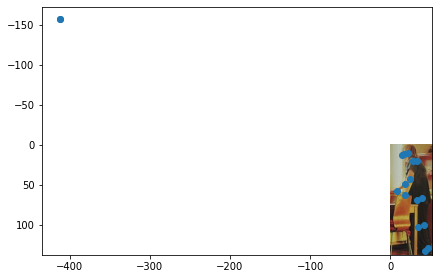

vis: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
xcoords: [ 87.  94.  80. 106.  76. 119.  78. 153.  61. 169.  29. 144. 113. 149.
  87. 186. 116.]
ycoords: [ 37.  29.  31.  34.  37.  64.  85.  98. 115. 121. 134. 159. 170. 250.
 229. 318. 297.]
ann_id: 442619
height: 346
image_id: 785
image_path: b'datasets/val2017/000000000785.jpg'
width: 218
Image shape: (346, 218, 3)


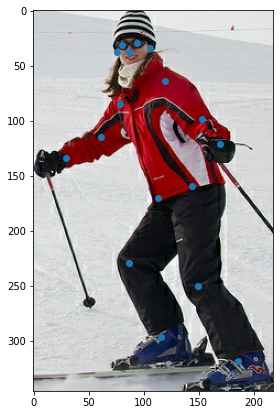

vis: [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 2. 1. 1. 1. 2. 2.]
xcoords: [ 222. -145.  215. -145.  193. -145.  191. -145.  246. -145.  278.  204.
  181.  202.  132.  168.   42.]
ycoords: [  38. -100.   34. -100.   44. -100.   93. -100.  116. -100.   91.  219.
  219.  332.  328.  426.  389.]
ann_id: 559508
height: 457
image_id: 872
image_path: b'datasets/val2017/000000000872.jpg'
width: 291
Image shape: (457, 291, 3)


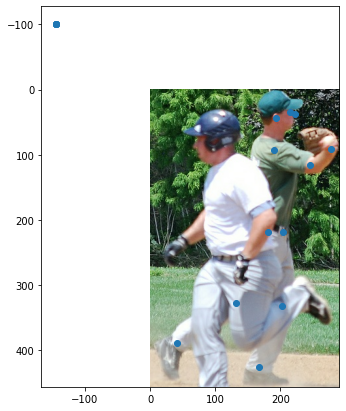

vis: [1. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.]
xcoords: [  48.   52. -163.   78. -163.  117.   73.  163.   82.  126.   32.  134.
   77.  131.   64.  213.   82.]
ycoords: [  61.   53. -126.   49. -126.  102.  106.  174.  166.  232.  205.  228.
  229.  354.  344.  284.  444.]
ann_id: 560228
height: 480
image_id: 872
image_path: b'datasets/val2017/000000000872.jpg'
width: 265
Image shape: (480, 265, 3)


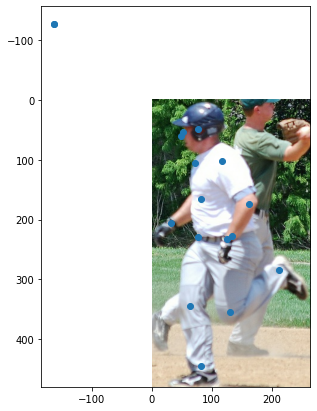

vis: [2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
xcoords: [  97.  102.   93. -277.   82.   92.   63.   95.   71.  115.  106.   54.
   26.   66.   10.   45.   19.]
ycoords: [  27.   25.   23. -189.   19.   38.   30.   58.   82.   86.  100.   77.
   61.  123.  100.  191.   56.]
ann_id: 439117
height: 208
image_id: 885
image_path: b'datasets/val2017/000000000885.jpg'
width: 140
Image shape: (208, 140, 3)


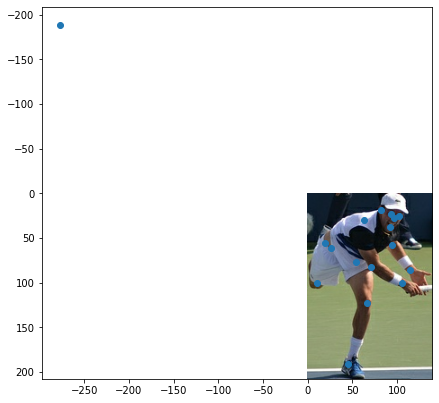

In [13]:
gen_examples_from_tfrecord("tfrecords/valid/file_valid_00-1024.tfrec", 5)

vis: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
xcoords: [  83.   98.   68.  142.   68.  188.   48.  240.   46.  278.   77.  171.
  100. -167. -167. -167. -167.]
ycoords: [  82.   61.   73.   65.   91.  175.  180.  332.  358.  455.  285.  441.
  446. -162. -162. -162. -162.]
ann_id: 453991
height: 465
image_id: 36
image_path: b'datasets/train2017/000000000036.jpg'
width: 310
Image shape: (465, 310, 3)


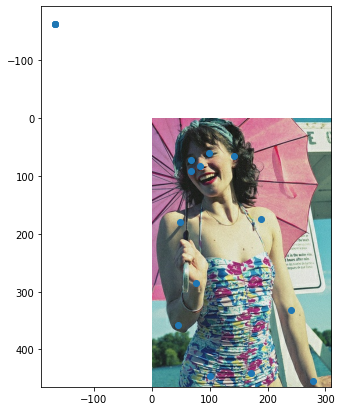

vis: [2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 0.]
xcoords: [  48.   50.   47.   56. -203.   56.   44.   54.   28.   36.   27.   36.
 -203.   24. -203.   14. -203.]
ycoords: [  16.   15.   14.   17. -260.   25.   24.   34.   31.   21.   22.   48.
 -260.   42. -260.   62. -260.]
ann_id: 198565
height: 73
image_id: 49
image_path: b'datasets/train2017/000000000049.jpg'
width: 65
Image shape: (73, 65, 3)


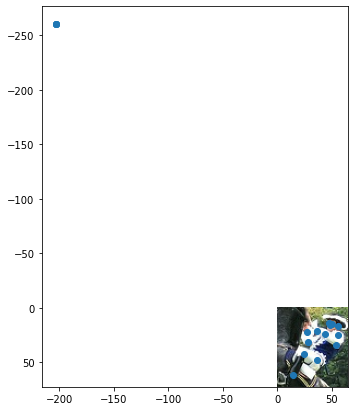

vis: [1. 2. 1. 2. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 0.]
xcoords: [  40.   42.   39.   49. -118.   48.   41.   33. -118. -118. -118.   40.
   34.   24. -118.   14. -118.]
ycoords: [   9.    8.    8.    9. -261.   18.   16.   26. -261. -261. -261.   43.
   41.   35. -261.   58. -261.]
ann_id: 254537
height: 62
image_id: 49
image_path: b'datasets/train2017/000000000049.jpg'
width: 56
Image shape: (62, 56, 3)


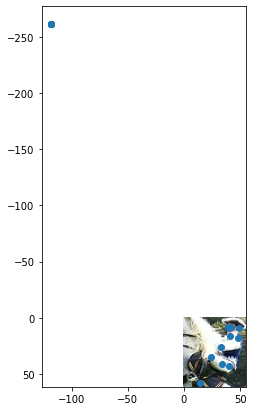

vis: [0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
xcoords: [-216. -216. -216.   41.   51.   25.   47.   15.   68.    7.   89.   15.
   33.   15.   52.   14.   38.]
ycoords: [-56. -56. -56.  17.  24.  28.  30.  14.  23.   6.  13.  70.  72.  82.
  53. 114.  85.]
ann_id: 471474
height: 118
image_id: 77
image_path: b'datasets/train2017/000000000077.jpg'
width: 103
Image shape: (118, 103, 3)


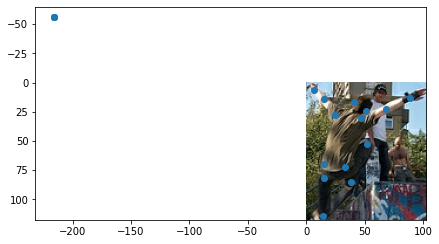

vis: [0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
xcoords: [-320. -320.   61. -320.   57.   35.   45.   17.   70.    6.   83.   10.
   20.   34.   48.   41.   37.]
ycoords: [-53. -53.  16. -53.  14.  13.  14.  18.  23.  29.  24.  39.  41.  61.
  57.  84.  87.]
ann_id: 502475
height: 97
image_id: 77
image_path: b'datasets/train2017/000000000077.jpg'
width: 94
Image shape: (97, 94, 3)


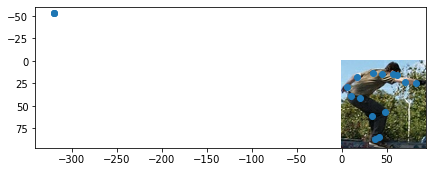

In [14]:
gen_examples_from_tfrecord("tfrecords/train/file_train_00-1024.tfrec", 5)